In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

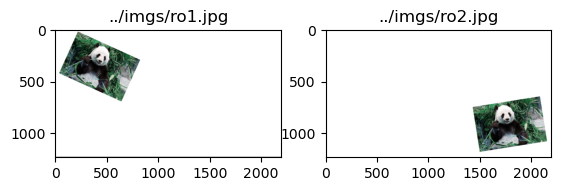

In [2]:
# feature matching する 2 画像の表示
origin_path = "../imgs/ro1.jpg"
ex_path = "../imgs/ro2.jpg"

img = cv.imread(origin_path)
ex_img = cv.imread(ex_path)

fig, axes = plt.subplots(1,2)

axes[0].imshow(img)
axes[0].set_title(origin_path)

axes[1].imshow(ex_img)
axes[1].set_title(ex_path)
plt.show()

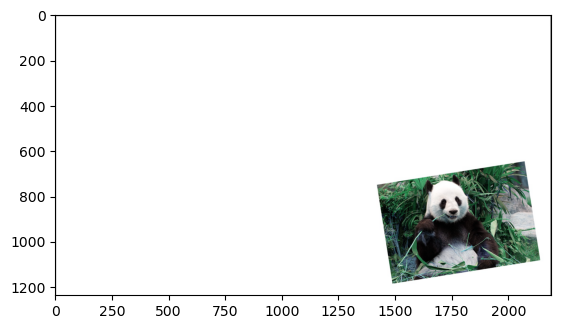

In [3]:
# resize
width, height, _ = img.shape
ex_img = cv.resize(ex_img, (height, width))
plt.imshow(ex_img)

In [4]:
def SIFT(img):
    sift = cv.SIFT_create()
    kp, desc = sift.detectAndCompute(img, None)
    return kp, desc

In [5]:
# get key point, descriptors
kp1, desc1 = SIFT(img)
kp2, desc2 = SIFT(ex_img)

In [6]:
# 総当たり matching
bf = cv.BFMatcher()

# option の選択
select_match_type = "match" # knn, match
select_filter = True # True, False

def get_good_match(matches, filter=True, thredhold=0.7):
    if filter:
        good_match = []

        for m, n in matches:
            if m.distance < thredhold * n.distance:
                good_match.append([m])
        return good_match
    else:
        return matches

3805


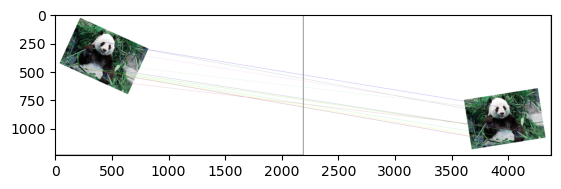

In [7]:
if select_match_type == "match":
    # matching
    matches = bf.match(desc1, desc2)

    good_match = matches

    # distance の近い点で並び替え
    good_match = sorted(good_match, key = lambda x: x.distance)

    # key point と画像の表示
    img_pair = cv.drawMatches(img, kp1, ex_img, kp2, good_match[:10], None, flags=2)

    print(len(good_match))

elif select_match_type == "knn":
    # matching
    matches = bf.knnMatch(desc1, desc2, k=2)

    # .distance から key point が一致しないと filter
    good_match = get_good_match(matches, filter=select_filter)

    # distance の近い点で並び替え
    good_match = sorted(good_match, key = lambda x: x[0].distance)
    
    # key point と画像の表示
    img_pair = cv.drawMatchesKnn(img, kp1, ex_img, kp2, good_match[:10], None, flags=2)

    print(len(good_match))

# draw matches の表示
plt.imshow(img_pair)
